In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/opt/spark-3.0.0-bin-hadoop2.7"

In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[7]").getOrCreate()
sc=spark.sparkContext

In [4]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

import numpy as np

In [5]:
rdd_base = sc.textFile('../Base/BD_100.csv').map(lambda s: s.split(','))
rdd_aux = rdd_base.map(lambda element: element[2])
rdd_etiq = rdd_aux.zipWithIndex().filter(lambda s: s[1]>0).map(lambda s: s[0])

In [6]:
#En esta celda se agrega el índice para dar el formato al archivo que requiere el clúster.
rdd = (sc.textFile('../resultados/100_com/cluster.txt'))
rdd_final = rdd.zipWithIndex().map(lambda element: (element[1], element[0]))
rdd_final.coalesce(1).saveAsTextFile("../resultados/100_com/arch_cluster")

**PRUEBA**

In [76]:
#df = spark.read.format("libsvm").option("numFeatures", "780").load("/opt/spark-3.0.0-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt")
df = spark.read.format("libsvm").option("numFeatures", "533").load("../resultados/100_com/arch_cluster/cluster.txt")

In [77]:
df.show(100)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(533,[0,6,13,35,3...|
|  0.0|(533,[25,316,317,...|
|  0.0|(533,[1,7,96,97,9...|
|  0.0|(533,[1,99,321,32...|
|  0.0|(533,[26,100,101,...|
|  0.0|(533,[8,14,27,39,...|
|  0.0|(533,[41,103,328,...|
|  0.0|(533,[2,15,16,27,...|
|  0.0|(533,[6,65,104,10...|
|  0.0|(533,[2,3,4,29,11...|
|  0.0|(533,[17,66,67,11...|
|  0.0|(533,[2,4,15,120,...|
|  0.0|(533,[2,4,30,42,1...|
|  0.0|(533,[3,7,18,127,...|
|  0.0|(533,[12,31,35,12...|
|  0.0|(533,[2,4,30,43,1...|
|  0.0|(533,[2,4,15,16,2...|
|  0.0|(533,[2,4,7,19,44...|
|  0.0|(533,[17,68,368],...|
|  0.0|(533,[3,10,16,20,...|
|  0.0|(533,[17,21,372],...|
|  0.0|(533,[69,139,140]...|
|  0.0|(533,[8,45,46,70,...|
|  0.0|(533,[3,147,148,3...|
|  0.0|(533,[22,25,32,14...|
|  0.0|(533,[151,381,382...|
|  0.0|(533,[31,73,384,3...|
|  0.0|(533,[9,11,14,47,...|
|  0.0|(533,[74,75,155,3...|
|  0.0|(533,[46,73,390,3...|
|  0.0|(533,[7,22,25,156...|
|  0.0|(533,[3

**Clustering**

In [78]:
# Loads data.
#dataset = spark.read.format("libsvm").load('/opt/spark-3.0.0-bin-hadoop2.7/data/mllib/sample_lda_libsvm_data.txt')
dataset = spark.read.format("libsvm").load('../resultados/100_com/arch_cluster/cluster.txt')

In [87]:
# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(3)
model = kmeans.fit(dataset)

In [88]:
# Make predictions
predictions = model.transform(dataset)

In [89]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = -0.026834554385760327


In [90]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.28125    0.16666667 0.10416667 0.10416667 0.07291667 0.07291667
 0.0625     0.04166667 0.05208333 0.05208333 0.04166667 0.04166667
 0.04166667 0.03125    0.03125    0.03125    0.03125    0.03125
 0.03125    0.03125    0.03125    0.03125    0.03125    0.03125
 0.03125    0.03125    0.03125    0.03125    0.03125    0.01041667
 0.03125    0.03125    0.03125    0.03125    0.03125    0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.         0.         0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333 0.02083333
 0.02083333 0.         0.         0.         0.02083333 0.01041667
 0.02083333 0.02083333 0.02083333 0.02083333 0.020

In [14]:
files="../resultados/100_com/centroides.txt"

for center in centers:
    file=open(str(files),'a+')
    file.write('\n')
    for i in range(len(center)):
        file.write(str(center[i]) +' ')

    file.close()

**MATPLOTLIB**

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

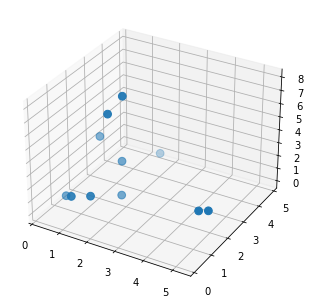

In [38]:
colores=['red','green','blue']
asignar=[]
for row in range(3):
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centers[0], centers[1], centers[2], asignar, s=60)

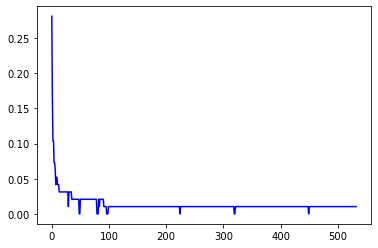

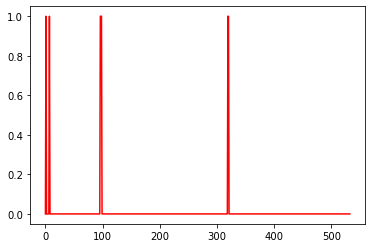

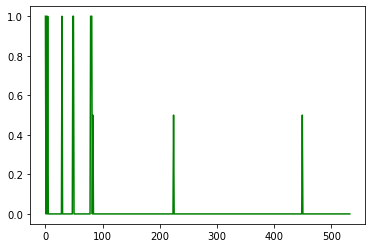

In [91]:
plt.plot(centers[0][:], color='blue')
plt.show()
plt.plot(centers[1][:], color='red')
plt.show()
plt.plot(centers[2][:], color='green')
plt.show()